# Proyek Analisis Data: [Bike Sharing Datasheet]
- **Nama:** [Brian Ilham Hermatristan]
- **Email:** [m008b4ky0872@bangkit.academy]
- **ID Dicoding:** [brian_ilham]

## Menentukan Pertanyaan Bisnis

- What's the correlation between temperature and bike rentals?
- What's the correlation between weather type and bike rentals?

## Import Semua Packages/Library yang Digunakan

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [13]:
day_df = pd.read_csv("/content/day.csv")
hours_df = pd.read_csv("/content/hour.csv")

new_order_df = pd.merge(
    left=day_df,
    right=hours_df,
    how="inner",
    left_on="dteday",
    right_on="dteday"
)

print(new_order_df.shape)
new_order_df.head()

(17379, 32)


,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- The provided code merges two DataFrames, day_df and hours_df which contain data on daily and hourly bike rentals respectively, into a new DataFrame called new_order_df.

  This is achieved using the merge function from the Pandas library, with an inner join specified. The join is performed by matching values in the dteday column which represents the date.

  The resulting new_order_df DataFrame combines information from both original DataFrames based on the common date.

### Assessing Data

In [14]:
print(new_order_df.info())
print(new_order_df.isnull().sum())
print(new_order_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant_x     17379 non-null  int64  
 1   dteday        17379 non-null  object 
 2   season_x      17379 non-null  int64  
 3   yr_x          17379 non-null  int64  
 4   mnth_x        17379 non-null  int64  
 5   holiday_x     17379 non-null  int64  
 6   weekday_x     17379 non-null  int64  
 7   workingday_x  17379 non-null  int64  
 8   weathersit_x  17379 non-null  int64  
 9   temp_x        17379 non-null  float64
 10  atemp_x       17379 non-null  float64
 11  hum_x         17379 non-null  float64
 12  windspeed_x   17379 non-null  float64
 13  casual_x      17379 non-null  int64  
 14  registered_x  17379 non-null  int64  
 15  cnt_x         17379 non-null  int64  
 16  instant_y     17379 non-null  int64  
 17  season_y      17379 non-null  int64  
 18  yr_y          17379 non-nu

**Insight:**
- The code assesses the newly created new_order_df DataFrame using three functions from the Pandas library:

  - info() provides a concise summary of the DataFrame, including the data types of each column and the number of non-null values.
  - isnull().sum() calculates the number of missing or null values (NaN) in each column of the DataFrame.
  - duplicated().sum() determines the number of duplicate rows present in the DataFrame.

### Cleaning Data

**Insight:**
- there's no need to clean the data

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
new_order_df.describe(include="all")

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


array([[<Axes: title={'center': 'instant_x'}>,
        <Axes: title={'center': 'season_x'}>,
        <Axes: title={'center': 'yr_x'}>,
        <Axes: title={'center': 'mnth_x'}>,
        <Axes: title={'center': 'holiday_x'}>,
        <Axes: title={'center': 'weekday_x'}>],
       [<Axes: title={'center': 'workingday_x'}>,
        <Axes: title={'center': 'weathersit_x'}>,
        <Axes: title={'center': 'temp_x'}>,
        <Axes: title={'center': 'atemp_x'}>,
        <Axes: title={'center': 'hum_x'}>,
        <Axes: title={'center': 'windspeed_x'}>],
       [<Axes: title={'center': 'casual_x'}>,
        <Axes: title={'center': 'registered_x'}>,
        <Axes: title={'center': 'cnt_x'}>,
        <Axes: title={'center': 'instant_y'}>,
        <Axes: title={'center': 'season_y'}>,
        <Axes: title={'center': 'yr_y'}>],
       [<Axes: title={'center': 'mnth_y'}>,
        <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday_y'}>,
        <Axes: title={'center': 'weekd

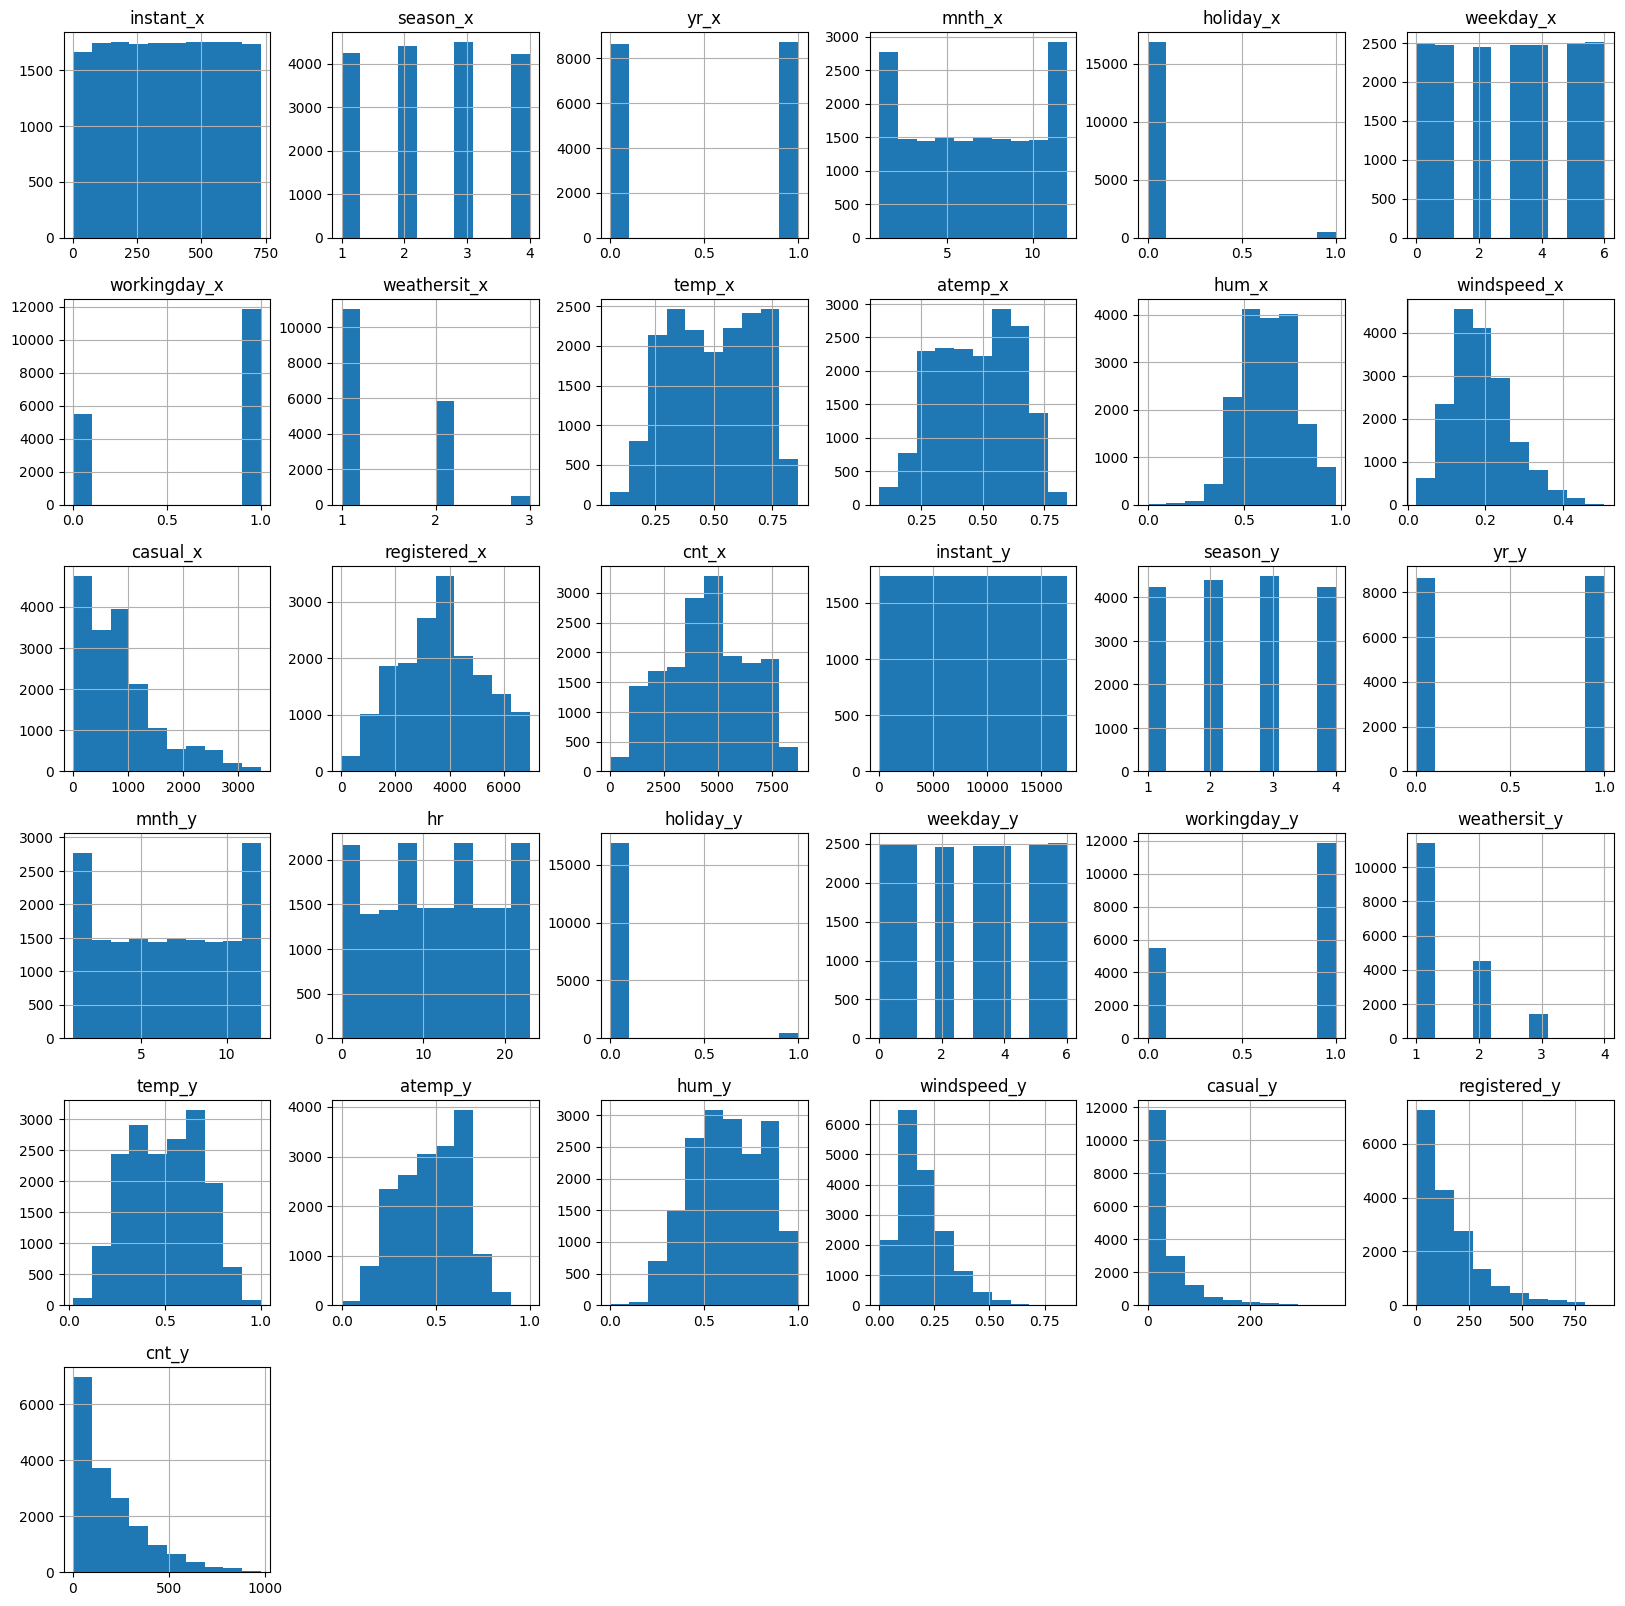

In [16]:
new_order_df.hist(figsize=(20,20))

**Insight :**

- The code performs Exploratory Data Analysis (EDA) on the new_order_df DataFrame using:

  - describe(include="all"): This generates descriptive statistics of the DataFrame, such as count, mean, standard deviation, minimum, and maximum values. The include="all" argument ensures that statistics are computed for both numerical and categorical columns.
  - hist(figsize=(20,20)): This creates a histogram for each numerical column in the DataFrame. Histograms provide a visual representation of the distribution of the data, showing the frequency of different values. The figsize argument sets the dimensions of the figure to ensure all histograms are clearly visible.



## Visualization & Explanatory Analysis

### Pertanyaan 1: What's the correlation between temperature and bike rentals

Correlation between temperature and bike rentals: 0.40


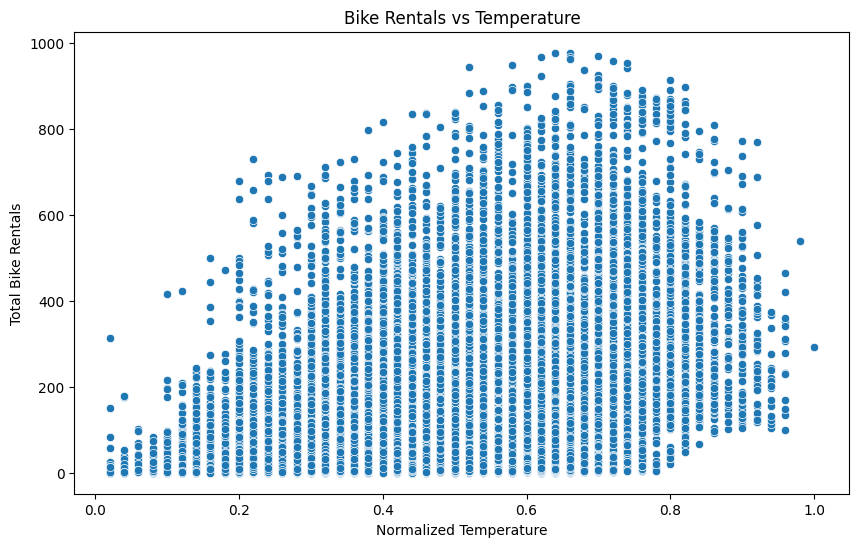

In [17]:
correlation = new_order_df['temp_y'].corr(new_order_df['cnt_y'])
print(f"Correlation between temperature and bike rentals: {correlation:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_y', y='cnt_y', data=new_order_df)
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Bike Rentals')
plt.show()

### Pertanyaan 2: What's the correlation between weather type and bike rentals

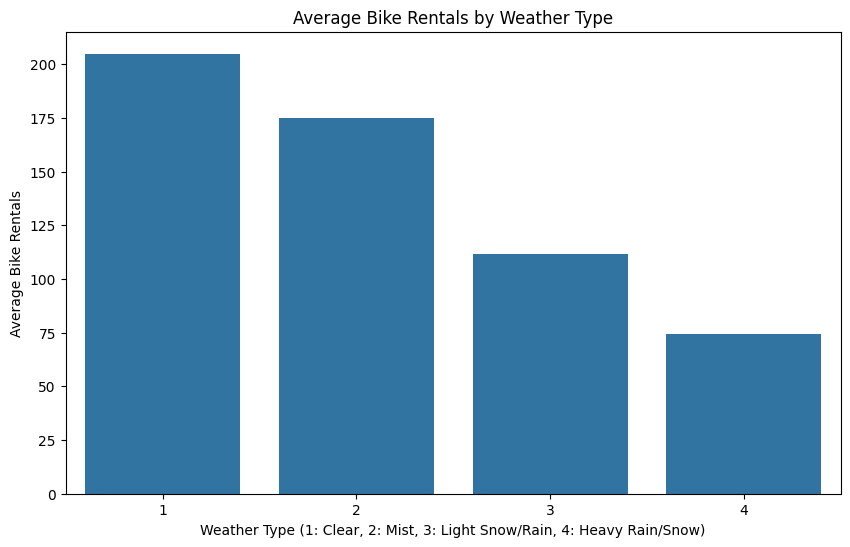

In [18]:
weather_rentals = new_order_df.groupby('weathersit_y')['cnt_y'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit_y', y='cnt_y', data=weather_rentals)
plt.title('Average Bike Rentals by Weather Type')
plt.xlabel('Weather Type (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow)')
plt.ylabel('Average Bike Rentals')
plt.show()

**Insight:**
  - The first part calculates the correlation between temperature (temp_y) and bike rentals (cnt_y) using the .corr() method. It then visualizes this relationship with a scatter plot using sns.scatterplot(), showing how bike rentals change with temperature.
  - The second part investigates the relationship between weather type (weathersit_y) and bike rentals. It groups the data by weather type and calculates the average bike rentals for each type using groupby() and mean(). The result is visualized with a bar plot using sns.barplot() to compare average rentals across different weather conditions.

## Analisis Lanjutan (Opsional)

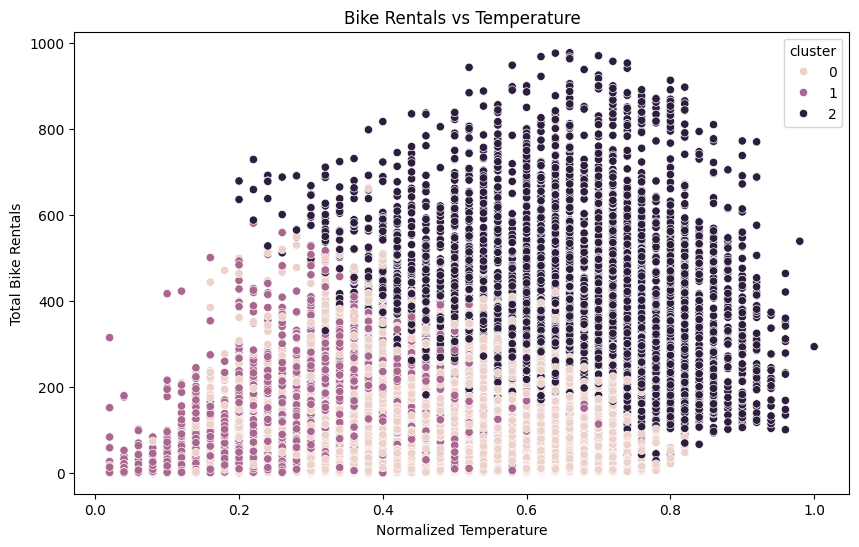

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


features = ['temp_y', 'hum_y', 'windspeed_y', 'cnt_y']


scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_order_df[features])


kmeans = KMeans(n_clusters=3, random_state=42)


kmeans.fit(scaled_data)


labels = kmeans.labels_


new_order_df['cluster'] = labels


plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_y', y='cnt_y', hue='cluster', data=new_order_df)
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Bike Rentals')
plt.show()

## Conclusion

The last part of the code performs KMeans clustering to group similar data points based on features like temperature, humidity, windspeed, and bike rentals.

Here's a breakdown:

1. Feature Selection: Selects the relevant features for clustering (temp_y, hum_y, windspeed_y, cnt_y).
2. Data Standardization: Scales the features using StandardScaler to ensure they have the same range and prevent features with larger values from dominating the clustering process.
3. KMeans Model Initialization: Creates a KMeans model with 3 clusters (n_clusters=3) and a random_state for reproducibility.
4. Model Training: Trains the KMeans model on the scaled data using kmeans.fit().
5. Cluster Assignment: Assigns each data point to a cluster based on the trained model and stores the labels in the labels variable.
6. Cluster Visualization: Adds a cluster column to the DataFrame and visualizes the clusters using a scatter plot, with different colors representing different clusters.

This analysis aims to identify patterns and group similar data points based on the selected features, potentially revealing insights into different types of bike rental behaviors.

In [20]:
new_order_df.to_csv("new_order_data.csv", index=False)